In [2]:
import cv2 as cv

#let us define a function to handle mouse clicks
def mouse_clicks(event, x, y, flags, params):
    """
    Handles mouse click events 

    Parameters:
    - event: The type of mouse event
    - x: The x-coordinate of the mouse click.
    - y: The y-coordinate of the mouse click.
    """
   
    global coordinates
    global count
    global copied_image

 
    if event == cv.EVENT_LBUTTONDOWN:
        coordinates.append([x, y])
        count += 1
        #cv2.circle(image, center_coordinates, radius, color, thickness)
        copied_image = cv.circle(copied_image, (x, y), 5, (1, 0, 0), -1)
        cv.imshow("Image", copied_image)
    if count == 4:
        cv.destroyAllWindows()
        cv.waitKey(1) # wait 1milsec



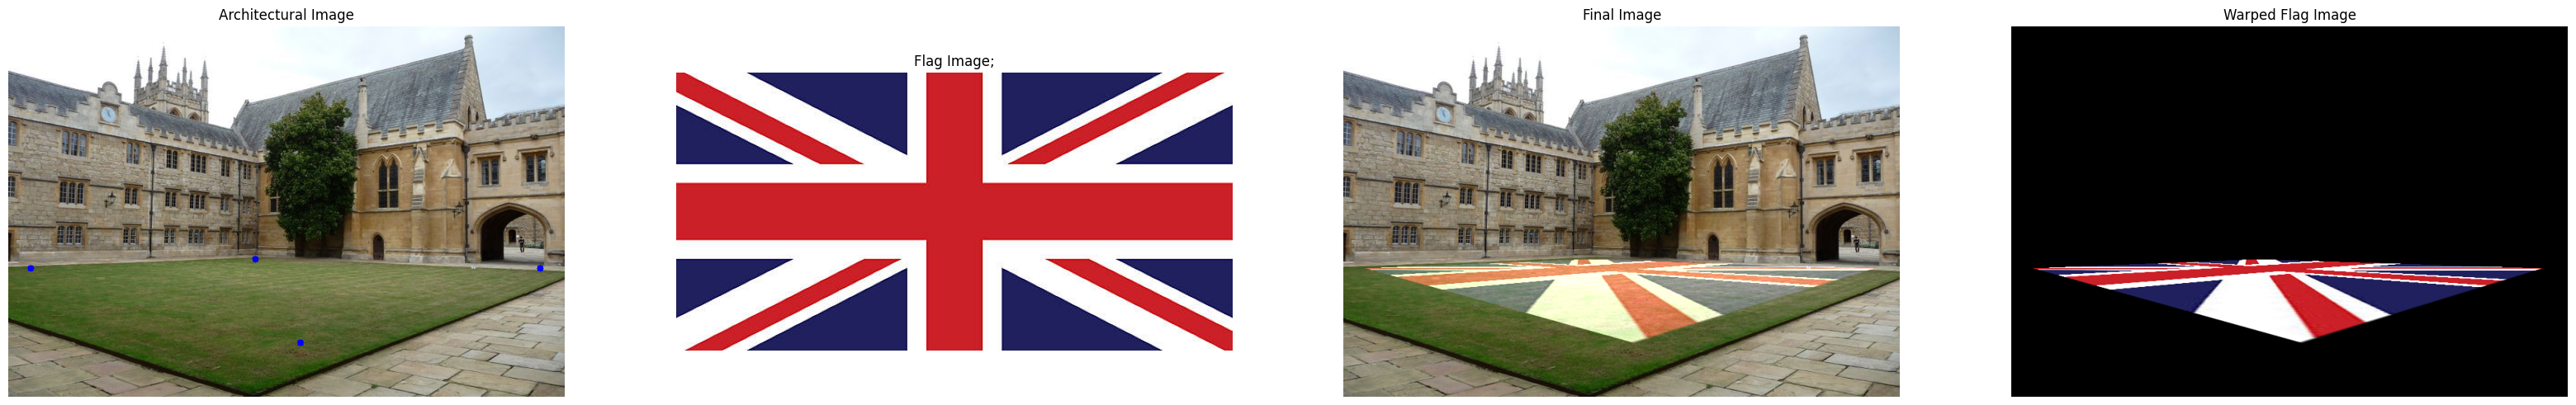

In [4]:
import numpy as np
import matplotlib.pyplot as plt

image_2 = cv.imread("flag.jpg")
image_1 = cv.imread("histplace.jpg")
image_1 = cv.resize(image_1, (0, 0), fx=1, fy=1)  


# Normalize pixel values 
image_1 = image_1.astype(np.float64) / 255.0
image_2 = image_2.astype(np.float64) / 255.0

copied_image = np.copy(image_1)

coordinates = []
count = 0

cv.imshow("Image", image_1)
cv.setMouseCallback("Image", mouse_clicks)
cv.waitKey(0)
cv.destroyAllWindows()


# calculating Hormographic matrix
# --------------------------------------------------------------------------------------------------------------------------
X = np.array([[0, 0, 1], [image_2.shape[1], 0, 1], [image_2.shape[1], image_2.shape[0], 1], [0, image_2.shape[0], 1]]).T
Y = np.array([[coordinates[0][0], coordinates[0][1], 1], [coordinates[1][0], coordinates[1][1], 1],
              [coordinates[2][0], coordinates[2][1], 1], [coordinates[3][0], coordinates[3][1], 1]]).T
O = np.array([[0], [0], [0]])

A = []
for i in range(4):
    A.append(np.concatenate((O.T, np.expand_dims(X.T[i, :], axis=0), np.expand_dims(-1 * Y[1, i] * X.T[i, :], axis=0)), axis=1))
    A.append(np.concatenate((np.expand_dims(X.T[i, :], axis=0), O.T, np.expand_dims(-1 * Y[0, i] * X.T[i, :], axis=0)), axis=1))

A = np.array(A).squeeze().astype(np.float64)
eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
H = eigen_vectors[:, np.argmin(eigen_values)]
H = H.reshape(3, -1)
# --------------------------------------------------------------------------------------------------------------------------
#warp the image
t_image_2 = cv.warpPerspective(image_2, H, (image_1.shape[1], image_1.shape[0]))

# Blending images
beta = 0.6
blended_img = cv.addWeighted(image_1, 1, t_image_2, beta, 0.0)
blended_img[blended_img > 1] = 1



# Plot
fig, ax = plt.subplots(1, 4, figsize=(40, 15))
ax[0].imshow(cv.cvtColor(copied_image.astype(np.float32), cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(image_2.astype(np.float32), cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(blended_img.astype(np.float32), cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(t_image_2.astype(np.float32), cv.COLOR_BGR2RGB))

ax[0].set_title("Architectural Image")
ax[1].set_title("Flag Image;")
ax[2].set_title("Final Image")
ax[3].set_title("Warped Flag Image")
                

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].axis("off")

plt.show()
